In [62]:
import numpy as np
import pandas as pd
from skew_autotransform import skew_autotransform
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [9]:
weather_df.describe(include='all')

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
count,96453,96453,96453,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 19:00:00+00:00,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
first,2005-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-12-31 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN


In [7]:
weather_df.isnull().sum()/weather_df.shape[0]*100

date                   0.0
summary                0.0
preciptype             0.0
temperature            0.0
apparenttemperature    0.0
humidity               0.0
windspeed              0.0
windbearing            0.0
visibility             0.0
loudcover              0.0
pressure               0.0
dailysummary           0.0
dtype: float64


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'temperature' . Skewness = 0.09


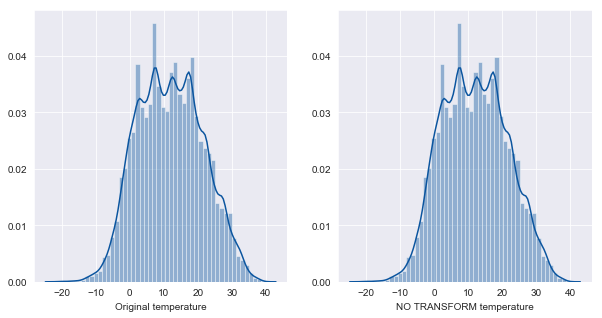


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'apparenttemperature' . Skewness = -0.06


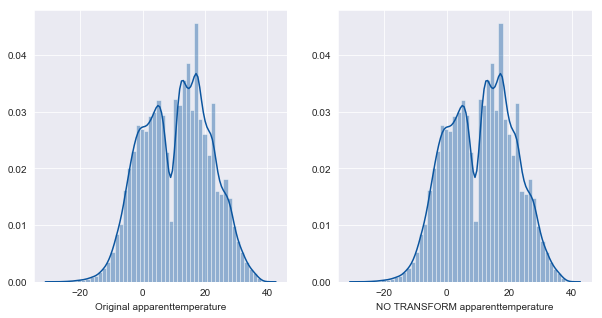


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'humidity' . Skewness = -0.72


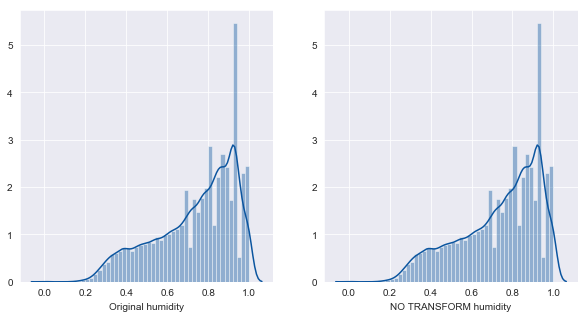


 ------------------------------------------------------

 'windspeed' had 'positive' skewness of 1.11

 Transformation yielded skewness of -0.00


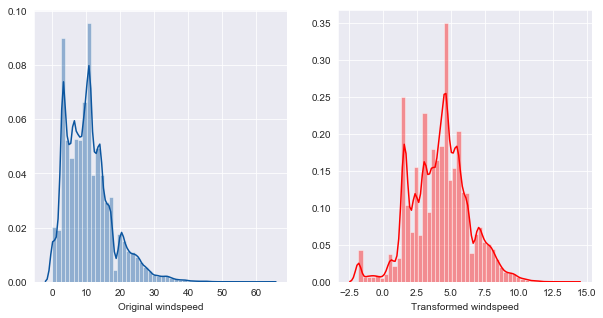


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'windbearing' . Skewness = -0.15


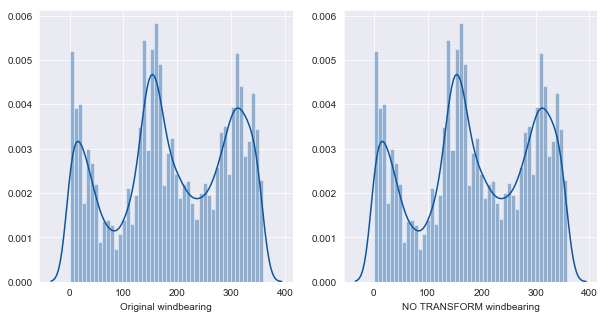


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'visibility' . Skewness = -0.50


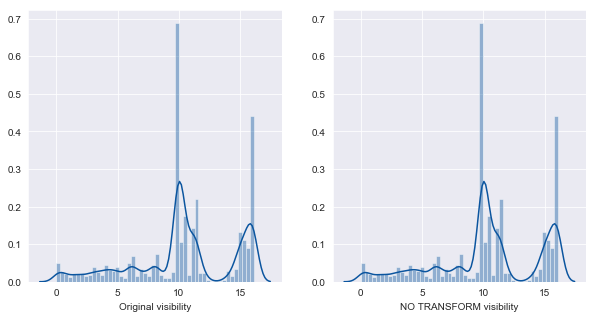


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'loudcover' . Skewness = 0.00


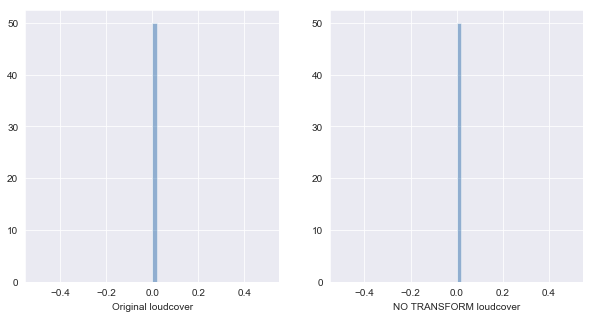


 ------------------------------------------------------

 'pressure' had 'negative' skewness of -8.42

 Transformation yielded skewness of -6.90


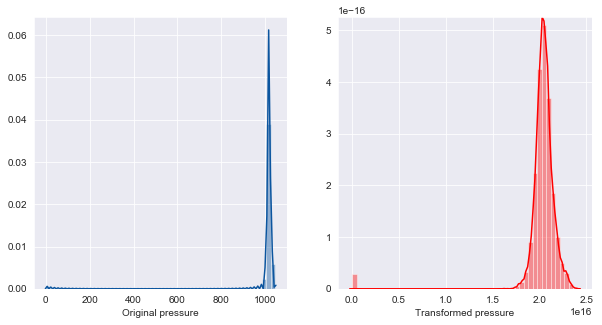

In [34]:
# check for skewness and normality
weather_df2 = skew_autotransform.skew_autotransform(weather_df.copy(deep=True), plot = True, exclude=('date','summary','preciptype', 'dailysummary'))


In [35]:
weather_df2.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,5.496027,251.0,15.8263,0.0,2.029094e+16,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,5.534225,259.0,15.8263,0.0,2.034772e+16,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,1.965373,204.0,14.9569,0.0,2.038299e+16,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,5.491771,269.0,15.8263,0.0,2.043656e+16,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,4.633226,259.0,15.8263,0.0,2.044797e+16,Partly cloudy throughout the day.


In [40]:
# Keep only columns of interest
weather_df3 = weather_df.loc[:,('temperature', 'humidity', 'windspeed', 'windbearing', 'pressure')]
corr = weather_df3.corr()
corr.style.background_gradient(cmap='RdBu_r')

,temperature,humidity,windspeed,windbearing,pressure
temperature,1,-0.632255,0.00895697,0.0299882,-0.00544711
humidity,-0.632255,1,-0.224951,0.000734645,0.00545426
windspeed,0.00895697,-0.224951,1,0.103822,-0.0492628
windbearing,0.0299882,0.000734645,0.103822,1,-0.0116509
pressure,-0.00544711,0.00545426,-0.0492628,-0.0116509,1


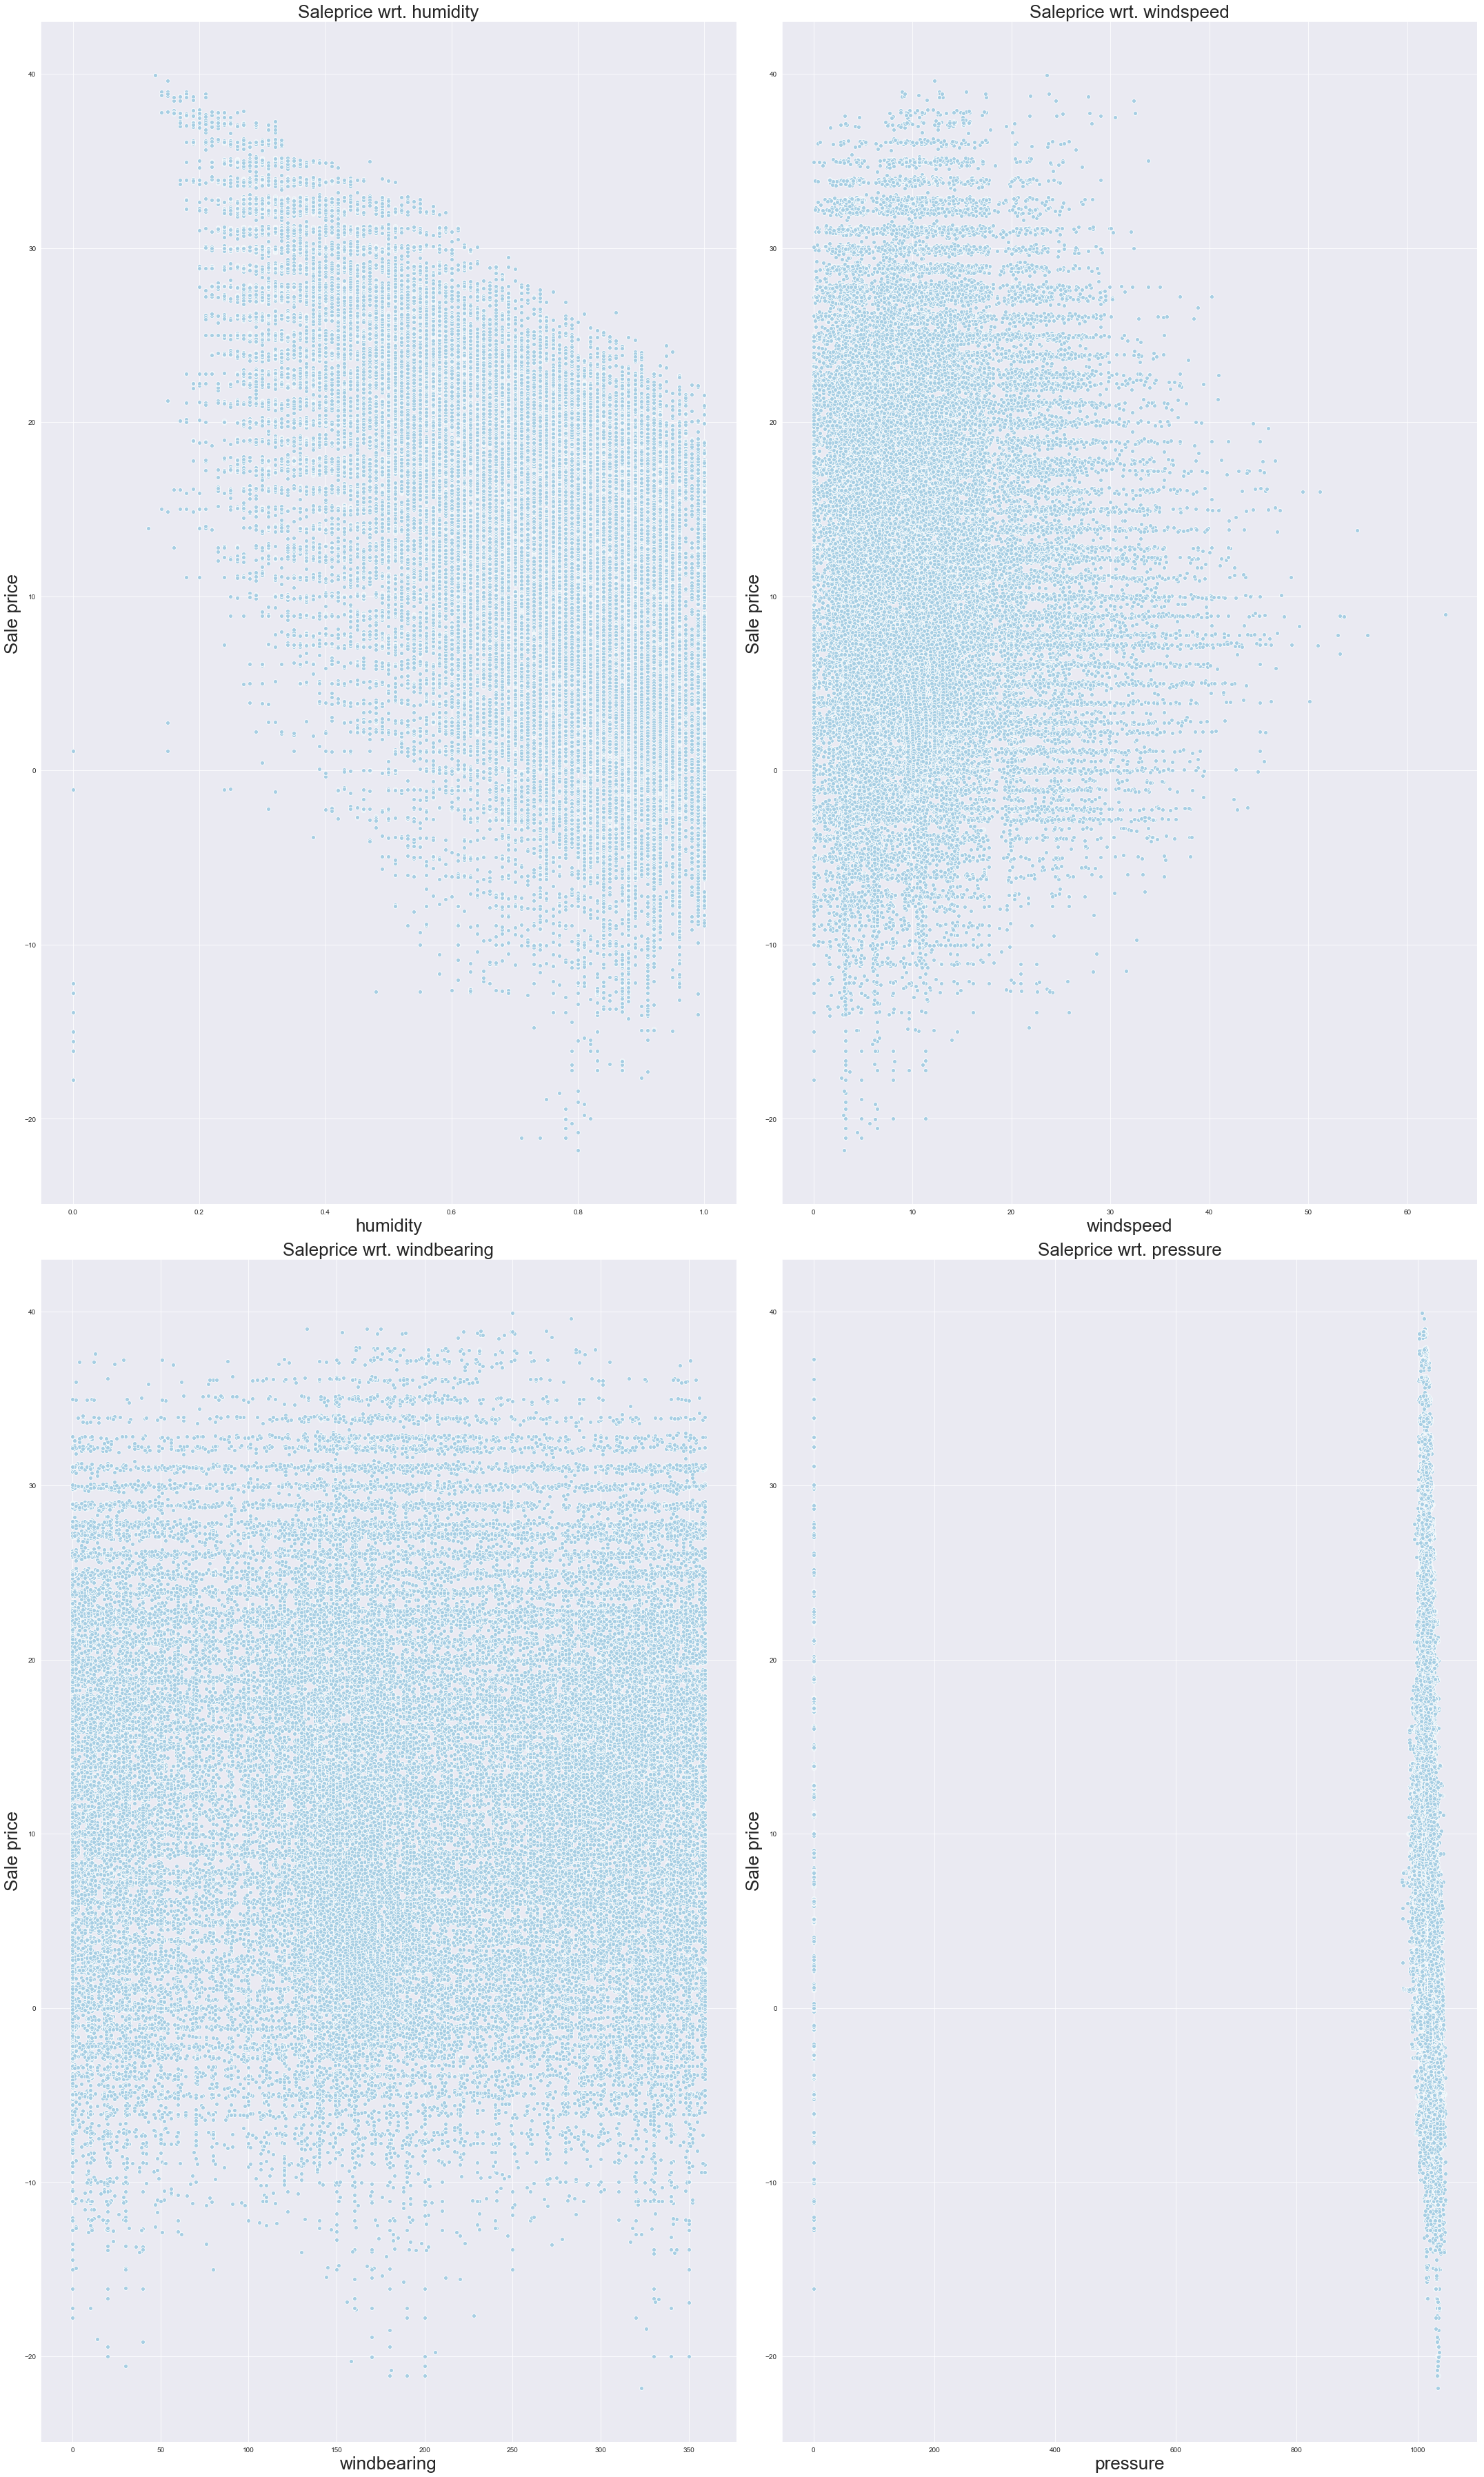

In [45]:
# visualize differences in temperature accross the different explanatory variables
plt.figure(figsize=(30,50))

cols = weather_df3.columns[1:]
for index, column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.scatterplot(x=column, y='temperature', data=weather_df3)
    plt.title('Temperature wrt. {}'.format(column), size=26)
    plt.ylabel('Temperature', size=26)
    plt.xlabel(column, size=26)

plt.tight_layout()

plt.show()

## SciKit Learn model

In [48]:
target = weather_df3['temperature']
data = weather_df3[cols]

# Initialize linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(data, target)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285306


Estimated model:

$$ Temperature = 37.93 -3.25*Humidity -2.01*Windspeed +  0.004*Windbearing -0.0007*Pressure\qquad$$

## StatsModels model

In [50]:
sm_data = sm.add_constant(data)

results = sm.OLS(target, sm_data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:56:44   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions check:

### 1. linearity of the model in its coefficients

### 2. the error term should be zero on average

In [53]:
predictions = lrm.predict(data)
errors = target - predictions
print("Mean of the errors in model is: {:.2}".format(np.mean(errors)))

Mean of the errors in model is: -7.4e-16


The average of the model's error is effectively zero.

### 3. homoscedasticity

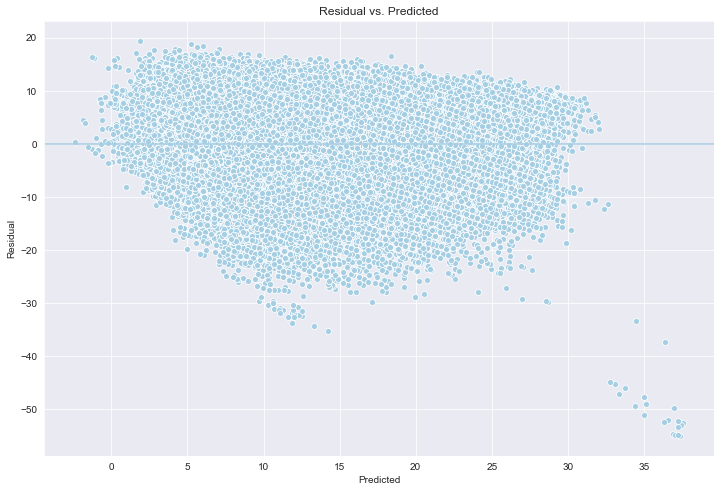

In [55]:
# visualizing homoscedasticity
plt.figure(figsize=(12,8))
sns.scatterplot(x=predictions, y=errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [57]:
# statistical tests for homoscedasticity
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. The test results reject the null hypothesis which means our errors are heteroscedastic.

### 4. low multicollinearity

In [58]:
corr = weather_df3.corr()
corr.style.background_gradient(cmap='RdBu_r')

,temperature,humidity,windspeed,windbearing,pressure
temperature,1,-0.632255,0.00895697,0.0299882,-0.00544711
humidity,-0.632255,1,-0.224951,0.000734645,0.00545426
windspeed,0.00895697,-0.224951,1,0.103822,-0.0492628
windbearing,0.0299882,0.000734645,0.103822,1,-0.0116509
pressure,-0.00544711,0.00545426,-0.0492628,-0.0116509,1


Low correlation between explanatory features

### 5. error terms should be uncorrelated with one another

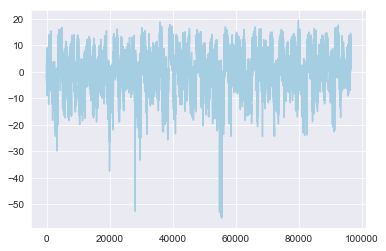

In [60]:
plt.plot(errors)
plt.show()

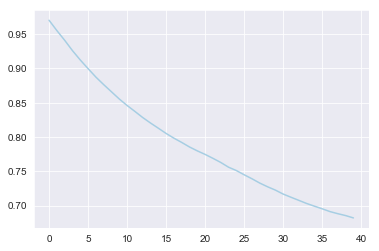

In [63]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

correlated error terms seem to drastically affect the model performance

### 6. features shouldn't be correlated with the errors

***